In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from models.wta_cnp import WTA_CNP

from matplotlib import pyplot as plt

In [8]:
obs = torch.arange(120).view(2, 3, 10, 2)  # batch_size x n_max_obs x (dx+dy)
mask = torch.zeros((3, 10, 1), dtype=torch.bool)  # batch_size x n_max_obs x 1

print(mask.shape)
mask = mask.repeat(2, 1, 1, 1)
print(mask.shape)

mask[:, 0:2, 0:5, 0] = True

# print(obs)
print(torch.masked_select(obs, mask))

torch.Size([3, 10, 1])
torch.Size([2, 3, 10, 1])
tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 20, 21, 22, 23, 24, 25, 26, 27,
        28, 29, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 80, 81, 82, 83, 84, 85,
        86, 87, 88, 89])


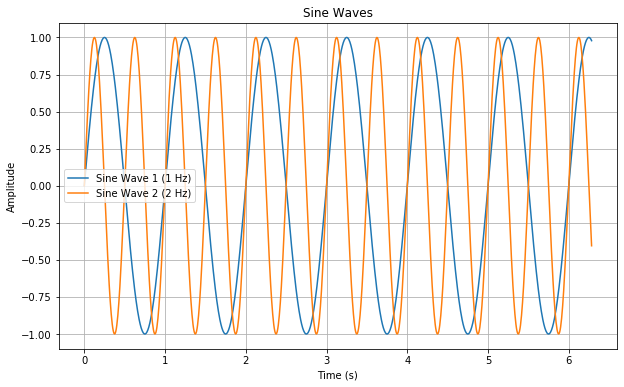

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters for the sine waves
frequency1 = 1  # Frequency of the first sine wave (in Hz)
frequency2 = 2  # Frequency of the second sine wave (in Hz)
amplitude = 1  # Amplitude of the sine waves

# Generate time values
t = np.linspace(0, 2*np.pi, 1000)  # 1000 points from 0 to 2*pi

# Calculate the sine waves
sine_wave1 = amplitude * np.sin(2 * np.pi * frequency1 * t)
sine_wave2 = amplitude * np.sin(2 * np.pi * frequency2 * t)

# Plot the sine waves
plt.figure(figsize=(10, 6))
plt.plot(t, sine_wave1, label=f'Sine Wave 1 ({frequency1} Hz)')
plt.plot(t, sine_wave2, label=f'Sine Wave 2 ({frequency2} Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Sine Waves')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
means = torch.tensor([0.99, 0.01]).repeat(2, 2, 1)
stds = torch.tensor([0.01, 0.01]).repeat(2, 2, 1)

dists = torch.distributions.Normal(means, stds)
print(dists.log_prob(torch.tensor([0.98, 0.98])))

tensor([[[ 3.1862e+00, -4.7008e+03],
         [ 3.1862e+00, -4.7008e+03]],

        [[ 3.1862e+00, -4.7008e+03],
         [ 3.1862e+00, -4.7008e+03]]])


In [3]:
means = torch.tensor([0.99, 0.01])
stds = torch.tensor([0.01, 0.01])

dists = torch.distributions.Normal(means, stds)
print(dists.log_prob(torch.tensor([0.98])))

d0 = torch.distributions.Normal(means[0], stds[0])
d1 = torch.distributions.Normal(means[1], stds[1])
print(d0.log_prob(torch.tensor([0.98])))
print(d1.log_prob(torch.tensor([0.98])))

tensor([ 3.1862e+00, -4.7008e+03])
tensor([3.1862])
tensor([-4700.8145])


In [13]:
t0 = torch.eye(4,4)
t1 = torch.eye(4,4)

print(torch.std(t0))

print(torch.std(t0, dim=1))

tensor(0.4472)
tensor([0.5000, 0.5000, 0.5000, 0.5000])


In [5]:
from tqdm import tqdm

max_std = -1
max_test = None


for i in tqdm(range(10_000_000)):
    test = torch.rand((4))
    sum = test.sum()
    test = test / sum
    
    std = torch.std(test)
    if std > max_std:
        max_std = std
        max_test = test

print(max_std)
print(max_test)

100%|██████████| 10000000/10000000 [04:17<00:00, 38839.33it/s]

tensor(0.4947)
tensor([0.9921, 0.0028, 0.0022, 0.0029])


In [6]:
p = torch.tensor([0.5, 0.5])
print(torch.sum(-p*torch.log(p)))

p = torch.tensor([0.00, 1.00])
print(torch.sum(-p*torch.log(p)))
print(torch.distributions.Categorical(p).entropy())

tensor(0.6931)
tensor(nan)
tensor(1.1921e-07)


In [3]:
import numpy as np
import time
nof = 1#_000_000

p = torch.rand(4)
p = p / p.sum()
pn = p.numpy()

start = time.time()
for i in range(nof):
    print(np.sum(-pn*np.log(pn)))
end = time.time()

print(f"np: {end-start}")

start = time.time()
for i in range(nof):
    print(torch.sum(-p*torch.log(p)))
end = time.time()

print(f"t: {end-start}")

start = time.time()
for i in range(nof):
    print(torch.distributions.Categorical(p).entropy())

end = time.time()

print(f"torch: {end-start}")

1.0365556
np: 0.000171661376953125
tensor(1.0366)
t: 0.003943204879760742
tensor(1.0366)
torch: 0.0005977153778076172


In [5]:
nof = 1_000_000

br = torch.zeros(4)
maxv =-1

for i in range(nof):
    r = torch.rand(4)
    v = F.softmax(r, dim=0)
    vp = v.prod()
    if vp > maxv:
        maxv = vp
        br = r

print(br)

tensor([0.8404, 0.8401, 0.8492, 0.8455])


In [7]:
F.softmax(br, dim=0)

tensor([0.2491, 0.2491, 0.2513, 0.2504])

In [7]:
dum = torch.distributions.Normal(2, 1)
print(-dum.log_prob(torch.tensor([[1.9], [2.1]])))

pred_dists = torch.distributions.Normal(torch.tensor([[0], [0], [0]]), torch.tensor([[1], [1], [1]])) 
dec_loss = (-pred_dists.log_prob(torch.tensor([[-0.1], [-0.1], [-0.1]])))
print(dec_loss)

tensor([[0.9239],
        [0.9239]])
tensor([[0.9239],
        [0.9239],
        [0.9239]])


In [27]:
def jensen_shannon_divergence(p, q):
    m = 0.5 * (p + q)
    kl_pm = F.kl_div(p.log(), m, reduction='batchmean')
    kl_qm = F.kl_div(q.log(), m, reduction='batchmean')
    jsd = 0.5 * (kl_pm + kl_qm)
    return jsd


p = torch.tensor([0.2, 0.3, 0.5])
q = torch.tensor([0.5, 0.3, 0.1])

# p, q = torch.distributions.Normal(2, 3), torch.distributions.Normal(2, 1)
# print(torch.distributions.kl.kl_divergence(p, q))

# print(torch.nn.functional.kl_div(p, q))

print(jensen_shannon_divergence(q, p))

tensor(0.0412)


In [21]:
pred_means = torch.rand(4, 3, 2)
pred_stds = torch.rand(4, 3, 2)


mutual_info = torch.zeros(4, 4)
for i in range(4):
    dist_i = torch.distributions.Normal(pred_means[i], pred_stds[i])
    for j in range(4):
        dist_j = torch.distributions.Normal(pred_means[j], pred_stds[j])
        mutual_info[i, j] = torch.distributions.kl.kl_divergence(dist_i, dist_j).mean((-2, -1))

print(mutual_info.sum())

mutual_info = torch.zeros(4, 4)
for i in range(4):
    for j in range(3):
        dist_ij = torch.distributions.Normal(pred_means[i, j], pred_stds[i, j])
        for j in range(i+1, 4):
        dist_j = torch.distributions.Normal(pred_means[j], pred_stds[j])
        mutual_info[i, j] = torch.distributions.kl.kl_divergence(dist_i, dist_j).mean((-2, -1))


torch.Size([3, 2])
torch.Size([3, 2])
torch.Size([3, 2])
tensor(27.0414)


In [ ]:
def jensen_shannon_divergence(p, q):
    m = 0.5 * (p + q)
    kl_pm = F.kl_div(p.log(), m, reduction='batchmean')
    kl_qm = F.kl_div(q.log(), m, reduction='batchmean')
    jsd = 0.5 * (kl_pm + kl_qm)
    return jsd


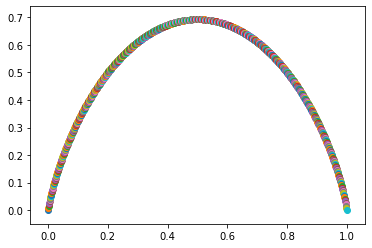

In [18]:
interval = 1000

x0 = torch.linspace(0, 1, interval)
x1 = torch.linspace(1, 0, interval)


for i in range(interval):
    plt.scatter(x0[i], torch.distributions.Categorical(torch.tensor([x0[i], x1[i]])).entropy())

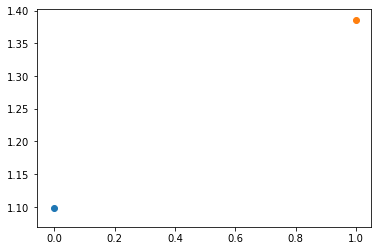

In [22]:

# for i in range(1000):
#     x0, x1, x2, x3 = torch.rand(1), torch.rand(1), torch.rand(1), torch.rand(1)
#     x0, x1, x2, x3 = x0, x1, x2, x3 / (x0 + x1 + x2 + x3)

#     plt.scatter(float(i)/2000, torch.distributions.Categorical(torch.tensor([x0, x1, x2, x3])).entropy())

plt.scatter(0, torch.distributions.Categorical(torch.tensor([0.33, 0.33, 0.34, 0])).entropy())
plt.scatter(1, torch.distributions.Categorical(torch.tensor([0.25, 0.25, 0.25, 0.25])).entropy())

In [9]:
from tqdm import tqdm

min_ent = 10000
min_test = None


for i in tqdm(range(10_000_000)):
    test = torch.rand((4))
    sum = test.sum()
    test = test / sum
    
    ent = torch.distributions.Categorical(test).entropy()
    if ent < min_ent:
        min_ent = ent
        min_test = test

print(min_ent)
print(min_test)

100%|██████████| 10000000/10000000 [10:53<00:00, 15291.62it/s]

tensor(0.0196)
tensor([1.0398e-05, 9.9741e-01, 6.8965e-04, 1.8942e-03])


In [2]:
model = WTA_CNP(1, 1, 10, 10, [256, 256, 256], num_decoders=2, decoder_hidden_dims=[128, 128], batch_size=1)

optimizer_wta = torch.optim.Adam(lr=1e-4, params=model.parameters())

In [13]:
o = torch.rand(1,5,2)
t = torch.rand(1,3,1)

optimizer_wta.zero_grad()
p,g = model(o,t)
l, n = model.loss(p,g,t)
l.backward()

optimizer_wta.step()


tensor([[[ 0.0677, -0.0468,  0.0210,  ...,  0.0356,  0.0416, -0.0292],
         [ 0.0667,  0.0714,  0.0612,  ...,  0.1168,  0.0055, -0.0330],
         [ 0.0917, -0.0167,  0.0386,  ...,  0.0267,  0.0123, -0.0341],
         [ 0.1197,  0.0088,  0.0888,  ...,  0.0967, -0.0128,  0.0088],
         [ 0.1003,  0.0129,  0.0799,  ...,  0.0950, -0.0102, -0.0051]]],
       grad_fn=<ViewBackward0>)
tensor(0.9446, grad_fn=<MeanBackward0>) tensor(0.2476, grad_fn=<MeanBackward0>) tensor([0.6883], grad_fn=<NegBackward0>) tensor(0.0693, grad_fn=<StdBackward0>)
